In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from tqdm.notebook import tqdm
import torch

In [ ]:
train_df = pd.read_csv("../input/twitter-sent/twitter_training.csv",header=None)
test_df = pd.read_csv('../input/twitter-sent/twitter_training.csv', header=None)

train_df.drop(0,axis=1,inplace=True)
test_df.drop(0,axis=1,inplace=True)

In [ ]:
train_df.shape

(74682, 3)

In [ ]:
txt_emoji = [
    ':)', ':P', ':D', ':|', ":'(", ':O', ":*", '<3', ':(', ';)',
    'xD', ':/', '=D'
]
txt_emoji_pic =[
    '😊', '😛', '😄', '😐', '😢', '😲', '😘', '😍', '😧', '😉', 
    '😁', '😒', '😀'
]

In [ ]:
add_emoji_txt = ['sad', 'unhappy', 'crying', 'smile', 'happy', 'love',"enjoy","shock","proud","cool","angry","kill","murder","tired","exhausted","sleep","sleepy","asleep","scared","scary","afraid","confuse","confused"]
add_emoji_pic =['😔', '😧','😭', '😆',  '😊', '😍','😄','😐','😤','😉','😡','😡','😡','😫','😫','😪','😪','😪','😰','😰','😰','😕','😕']

In [ ]:
def emoji_conv(txt, conv_txt, conv_pic):
    temp = []
    for i in txt:
        for j in range(len(conv_txt)):
            if i == conv_txt[j]:
                i = conv_pic[j]
        temp.append(i)
    return ' '.join(temp)
    

In [ ]:
def conv_emoticon_on_data(df_data):
    conv_text = []
    for idx, row in df_data.iterrows():
        txt = [i for i in row['post'].split()]
        emoji_found = emoji_conv(txt, txt_emoji, txt_emoji_pic)
        conv_text.append(emoji_found)
    return conv_text

In [ ]:
def add_emoji_text_data(df_data):
    reform_pos_text = []
    for ct in df_data:
        txt = [i for i in ct.split()]
        emoji_found = emoji_conv(txt, add_emoji_txt, add_emoji_pic)
        reform_pos_text.append(emoji_found)
    return reform_pos_text

In [ ]:
def new_df_emoji_tweet(data, polarity):
    temp = pd.DataFrame(columns=['sentiment', 'post'])
    temp['post'] = data
    temp['sentiment'] = polarity
    return temp

In [ ]:
train_df.columns = ['platform','sentiment','post']
test_df.columns = ['platform','sentiment','post']

df = pd.concat([train_df,test_df], axis=0)

In [ ]:
df

,platform,sentiment,post
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
def isfloat(x):
    if(type(x) == float ):
        return False
    else:
        return True
df = df[df["post"].apply(isfloat)]


In [ ]:

df.sentiment = df.sentiment.map({"Neutral":0, "Irrelevant":0 ,"Positive":1,"Negative":-1})

/tmp/ipykernel_47/4275400694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentiment = df.sentiment.map({"Neutral":0, "Irrelevant":0 ,"Positive":1,"Negative":-1})


In [ ]:
df

,platform,sentiment,post
0,Borderlands,1,im getting on borderlands and i will murder yo...
1,Borderlands,1,I am coming to the borders and I will kill you...
2,Borderlands,1,im getting on borderlands and i will kill you ...
3,Borderlands,1,im coming on borderlands and i will murder you...
4,Borderlands,1,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,1,Just realized that the Windows partition of my...
74678,Nvidia,1,Just realized that my Mac window partition is ...
74679,Nvidia,1,Just realized the windows partition of my Mac ...
74680,Nvidia,1,Just realized between the windows partition of...


In [ ]:
Df1 = df[df["sentiment"] == 1]
Df2 = df[df["sentiment"] == -1]
Df3 = df[df["sentiment"] == 0]

In [ ]:
df1 = conv_emoticon_on_data(Df1)
df1 = add_emoji_text_data(df1)

df2 = conv_emoticon_on_data(Df2)
df2 = add_emoji_text_data(df2)

df3 = conv_emoticon_on_data(Df3)
df3 = add_emoji_text_data(df3)

In [ ]:
df1 = new_df_emoji_tweet(df1,1)
df2 = new_df_emoji_tweet(df2,-1)
df3 = new_df_emoji_tweet(df3,0)
dfn = pd.concat([df1,df2,df3],axis = 0)

<h2>LSTM and naive bayes MODELs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Assuming you have labeled data in 'X' and 'y' where 'X' contains text data and 'y' contains sentiment labels (e.g., 0 for negative, 1 for neutral, 2 for positive)
from sklearn.preprocessing import LabelEncoder


<h3>WITHOUT EMOJI

In [ ]:
X = df['post']
y = df["sentiment"]

In [ ]:
classss = set(y)
print(classss)

{0, 1, -1}


NAIVE BAYES CLASSIFIER

In [ ]:

# Assuming you have labeled data in 'X' and 'y' where 'X' contains text data and 'y' contains sentiment labels (0 for negative, 1 for neutral, 2 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create and train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy}")


Multinomial Naive Bayes Accuracy: 0.815061319639177


LSTM

In [ ]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize and pad the text data
tokenizer = Tokenizer(num_words=10000)  # You can adjust the vocabulary size
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=100)  # You can adjust the sequence length

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Create an LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
model.add(LSTM(64))
model.add(Dense(4, activation='softmax'))  # 4 output classes for negative, neutral,irrelevant and positive

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {accuracy}")


Epoch 1/5
1850/1850 [==============================] - 129s 69ms/step - loss: 0.6164 - accuracy: 0.7358 - val_loss: 0.4136 - val_accuracy: 0.8363
Epoch 2/5
1850/1850 [==============================] - 125s 68ms/step - loss: 0.3113 - accuracy: 0.8808 - val_loss: 0.2722 - val_accuracy: 0.8981
Epoch 3/5
1850/1850 [==============================] - 126s 68ms/step - loss: 0.2054 - accuracy: 0.9212 - val_loss: 0.2219 - val_accuracy: 0.9192
Epoch 4/5
1850/1850 [==============================] - 126s 68ms/step - loss: 0.1530 - accuracy: 0.9398 - val_loss: 0.1869 - val_accuracy: 0.9339
Epoch 5/5
925/925 [==============================] - 15s 17ms/step - loss: 0.1756 - accuracy: 0.9378
LSTM Accuracy: 0.9378019571304321


In [ ]:
loss

0.17560715973377228

In [ ]:
accuracy

0.9378019571304321

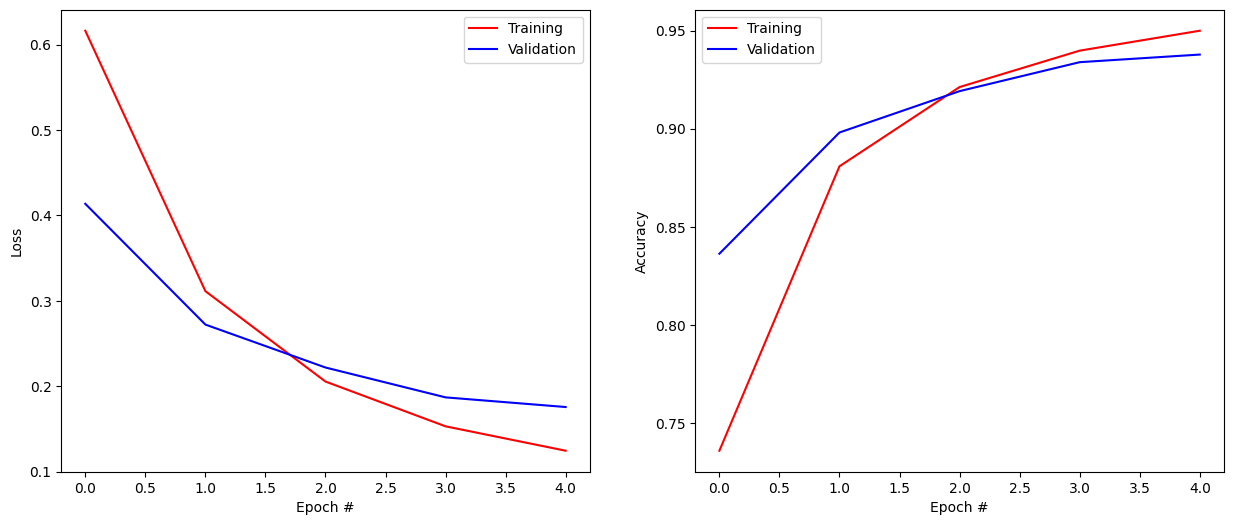

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h3>WITH EMOJI

In [ ]:
dfn["anger"] = 0
dfn["anticipation"] = 0
dfn["disgust"] = 0
dfn["fear"] = 0
dfn["joy"] = 0
dfn["sadness"] = 0
dfn["surprise"] = 0
dfn["trust"] = 0

In [ ]:
emoji = pd.read_csv("EmoTag1200-scores.csv")

In [ ]:
dfn.head()

,sentiment,post,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1,"im getting on borderlands and i will 😡 you all ,",0,0,0,0,0,0,0,0
1,1,"I am coming to the borders and I will 😡 you all,",0,0,0,0,0,0,0,0
2,1,"im getting on borderlands and i will 😡 you all,",0,0,0,0,0,0,0,0
3,1,"im coming on borderlands and i will 😡 you all,",0,0,0,0,0,0,0,0
4,1,im getting on borderlands 2 and i will 😡 you m...,0,0,0,0,0,0,0,0


In [ ]:
for i in range(dfn.shape[0]):
    for j in range(emoji.shape[0]):
        if emoji.iloc[j,1] in dfn.iloc[i,1]:
            dfn.iloc[i,2:] += emoji.iloc[j,3:]

In [ ]:
X = dfn.iloc[:,1:]
y = dfn["sentiment"]

In [ ]:
classss = set(y)
print(classss)

{0, 1, -1}


NIAVE BAYES CLASSIFIER

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_features = 5000  # You can adjust max_features based on your data
vectorizer = CountVectorizer(max_features=max_features, stop_words='english')  
X_train_text_transformed = vectorizer.fit_transform(X_train['post'])
X_test_text_transformed = vectorizer.transform(X_test['post'])

X_train_combined = np.concatenate([X_train_text_transformed.toarray(), X_train.iloc[:,1:]], axis=1)
X_test_combined = np.concatenate([X_test_text_transformed.toarray(), X_test.iloc[:,1:]], axis=1)


naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_combined, y_train)

y_pred = naive_bayes_model.predict(X_test_combined)


accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy}")


Multinomial Naive Bayes Accuracy: 0.676


LSTM

In [ ]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize and pad the text data
tokenizer = Tokenizer(num_words=10000)  # You can adjust the vocabulary size
tokenizer.fit_on_texts(X["post"])
X_sequences = tokenizer.texts_to_sequences(X["post"])
X_padded = pad_sequences(X_sequences, maxlen=100)  # You can adjust the sequence length
X_combined_numeric = np.concatenate([X_padded, X.iloc[:,1:]], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Create an LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
model.add(LSTM(64))
model.add(Dense(4, activation='softmax'))  # 4 output classes for negative, neutral,irrelevant and positive

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {accuracy}")


Epoch 1/5

938/938 [==============================] - 58s 59ms/step - loss: 0.7773 - accuracy: 0.6466 - val_loss: 0.5870 - val_accuracy: 0.7562

Epoch 2/5

938/938 [==============================] - 59s 63ms/step - loss: 0.4752 - accuracy: 0.8106 - val_loss: 0.4884 - val_accuracy: 0.8021

Epoch 3/5

938/938 [==============================] - 55s 59ms/step - loss: 0.3562 - accuracy: 0.8622 - val_loss: 0.4162 - val_accuracy: 0.8343

Epoch 4/5

938/938 [==============================] - 55s 58ms/step - loss: 0.2730 - accuracy: 0.8960 - val_loss: 0.4035 - val_accuracy: 0.8493

Epoch 5/5

938/938 [==============================] - 56s 60ms/step - loss: 0.2204 - accuracy: 0.9152 - val_loss: 0.3926 - val_accuracy: 0.8601

469/469 [==============================] - 8s 16ms/step - loss: 0.3926 - accuracy: 0.8601

LSTM Accuracy: 0.8600666522979736


In [ ]:
loss

0.39257919788360596

In [ ]:
accuracy

0.8600666522979736

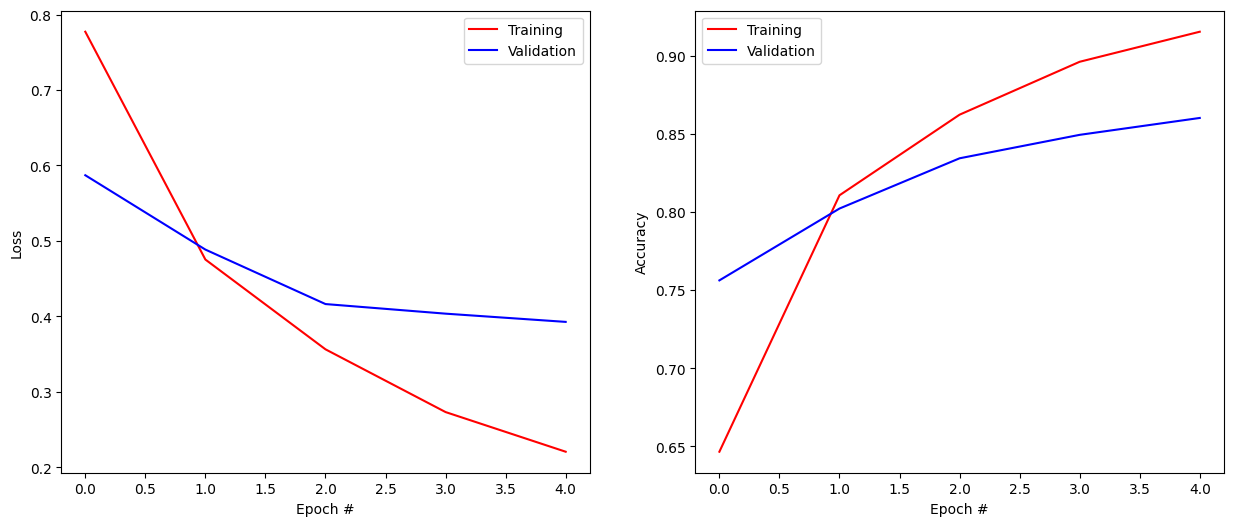

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

TRANSFORMERS

In [ ]:
df = pd.read_csv("../input/twitter-sent/twitter_training.csv",header=None)
df.drop([0],inplace=True,axis =1)
df.columns =['platform','sentiment','post']

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer,AutoModelForSequenceClassification


In [ ]:
model_name='distilbert-base-uncased-finetuned-sst-2-english'

In [ ]:
model=AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer=AutoTokenizer.from_pretrained(model_name)

In [ ]:
classifier=pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [ ]:
df.head()

,platform,sentiment,post
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
results=classifier(list(df['post'][:35]))
results


[{'label': 'NEGATIVE', 'score': 0.9834704995155334},
 {'label': 'POSITIVE', 'score': 0.9932871460914612},
 {'label': 'POSITIVE', 'score': 0.9783738851547241},
 {'label': 'NEGATIVE', 'score': 0.9768757820129395},
 {'label': 'POSITIVE', 'score': 0.7018879055976868},
 {'label': 'NEGATIVE', 'score': 0.9805619120597839},
 {'label': 'NEGATIVE', 'score': 0.7845364212989807},
 {'label': 'NEGATIVE', 'score': 0.9357826113700867},
 {'label': 'POSITIVE', 'score': 0.9987744688987732},
 {'label': 'NEGATIVE', 'score': 0.937289834022522},
 {'label': 'NEGATIVE', 'score': 0.9648420810699463},
 {'label': 'POSITIVE', 'score': 0.7795965671539307},
 {'label': 'POSITIVE', 'score': 0.9972885847091675},
 {'label': 'POSITIVE', 'score': 0.9972885847091675},
 {'label': 'POSITIVE', 'score': 0.9980003237724304},
 {'label': 'POSITIVE', 'score': 0.998803973197937},
 {'label': 'POSITIVE', 'score': 0.9034886956214905},
 {'label': 'NEGATIVE', 'score': 0.9396255612373352},
 {'label': 'POSITIVE', 'score': 0.99944120645523

In [ ]:
token=tokenizer.tokenize(df['post'][0])

In [ ]:
token_id=tokenizer.convert_tokens_to_ids(token)

In [ ]:
input_ids=tokenizer(df['post'][0])

In [ ]:
X_train=list(df['post'][:10])

In [ ]:
batch=tokenizer(X_train,padding=True,truncation=True,max_length=512,return_tensors='pt')


In [ ]:
import torch
import torch.nn.functional as F


In [ ]:
with torch.no_grad():
    outputs=model(**batch)
    print(outputs)
    predictions=F.softmax(outputs.logits, dim=1)
    print(predictions)
    labels=torch.argmax(predictions,dim=1)
    print(labels)
    labels=[model.config.id2label[label_id] for label_id in labels.tolist()]
    print(labels)


SequenceClassifierOutput(loss=None, logits=tensor([[ 2.2075, -1.8785],
        [-2.4459,  2.5511],
        [-1.8743,  1.9377],
        [ 2.0326, -1.7109],
        [-0.3719,  0.4844],
        [ 2.1153, -1.8056],
        [ 0.6950, -0.5973],
        [ 1.4525, -1.2266],
        [-3.2673,  3.4359],
        [ 1.4471, -1.2574]]), hidden_states=None, attentions=None)
tensor([[0.9835, 0.0165],
        [0.0067, 0.9933],
        [0.0216, 0.9784],
        [0.9769, 0.0231],
        [0.2981, 0.7019],
        [0.9806, 0.0194],
        [0.7845, 0.2155],
        [0.9358, 0.0642],
        [0.0012, 0.9988],
        [0.9373, 0.0627]])
tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 0])
['NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE']


In [ ]:
df['sentiment'][:10].tolist()


['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive']

In [ ]:
df.head()

,platform,sentiment,post
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
import re

In [ ]:
def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', str(text))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [ ]:
df['Preprocessed Text'] = df['post'].apply(clean_text) 

In [ ]:
X_train=list(df['Preprocessed Text'][:1000])

In [ ]:
batch=tokenizer(X_train,padding=True,truncation=True,max_length=512,return_tensors='pt')

In [ ]:
with torch.no_grad():
    outputs=model(**batch)
    #print(outputs)
    predictions=F.softmax(outputs.logits, dim=1)
    #print(predictions)
    labels=torch.argmax(predictions,dim=1)
    #print(labels)
    labels=[model.config.id2label[label_id] for label_id in labels.tolist()]

In [ ]:
new_df=df[:1000]

In [ ]:
new_df['Label1'] = labels

/tmp/ipykernel_47/3083980595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Label1'] = labels


In [ ]:
new_df['sentiment'].value_counts()

sentiment
Positive      424
Neutral       282
Negative      192
Irrelevant    102
Name: count, dtype: int64

In [ ]:
new_df['Label1'].value_counts()

Label1
NEGATIVE    526
POSITIVE    474
Name: count, dtype: int64

In [ ]:
acc_list = []
for result in results:
    acc_list.append(result["score"])
accuracy = np.mean(acc_list)
print("ACCURACY with emojis Transformers: ",accuracy)

0.9659307616097587


In [ ]:
new = []
for x in predictions:
    new.append(max(x))
a = sum(new)/len(new)
print(a)